In [23]:
%load_ext dotenv
%dotenv

In [2]:
import os
from dotenv import load_dotenv

load_dotenv() 
ROOT = os.getenv("ROOT")
DATA = os.getenv("DATA")
SCRIPTS = os.getenv("SCRIPTS")

# Make root
os.chdir(SCRIPTS)
print(os.getcwd())

/home/callebalik/clinical_NLP_SE/scripts


In [11]:
from pathlib import Path
from metrics.conll2003_utills import create_total_target_vector
from metrics.confusion_matrix import generate_confusion_matrix


a1 = create_total_target_vector(Path(f"{DATA}/interim/corpus/a1"))
a2 = create_total_target_vector(Path(f"{DATA}/interim/corpus/a2"))

classes = ["SYM","FND","NEG","DIS","O"]
cm = generate_confusion_matrix(a1, a2, classes)
cm

array([[  34,    9,    0,    0,    3],
       [  15,  103,    3,    0,   28],
       [   0,    0,   70,    0,    4],
       [   7,   18,    0,   19,    4],
       [   4,    9,    1,    0, 2007]])

In [1]:
from pathlib import Path
import spacy

from metrics.spacy_utills import create_total_prediction_vector
from metrics.spacy_utills import create_prediction_vector

corpus = Path(DATA / "raw/corpus/curation")

nlp = spacy.load("sv_pipeline")

docs = []

pathlist = Path(corpus).glob("**/*.conll")

for path in pathlist:
    create_prediction_vector()

create_total_prediction_vector(nlp, docs)

In [ ]:
def get_dataset_labels(annotation_set):
    return sorted(set(create_total_target_vector(annotation_set)))

(array([[7.39130435e-01, 1.95652174e-01, 0.00000000e+00, 0.00000000e+00,
         6.52173913e-02],
        [1.00671141e-01, 6.91275168e-01, 2.01342282e-02, 0.00000000e+00,
         1.87919463e-01],
        [0.00000000e+00, 0.00000000e+00, 9.45945946e-01, 0.00000000e+00,
         5.40540541e-02],
        [1.45833333e-01, 3.75000000e-01, 0.00000000e+00, 3.95833333e-01,
         8.33333333e-02],
        [1.97921821e-03, 4.45324097e-03, 4.94804552e-04, 0.00000000e+00,
         9.93072736e-01]]),
 <AxesSubplot:title={'center':'Multi-class Confusion Matrix'}, xlabel='annotator2', ylabel='annotator1'>,
 <module 'matplotlib.pyplot' from '/home/callebalik/.virtualenvs/venv/lib/python3.8/site-packages/matplotlib/pyplot.py'>)

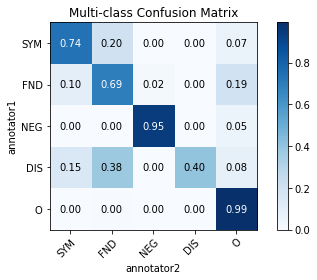

In [22]:
from plot_confusion_matrix import plot_confusion_matrix

classes = ["SYM","FND","NEG","DIS","O"]

plot_confusion_matrix(a1, a2, classes=classes, normalize=True, xlabel="annotator2", ylabel="annotator1")